In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Pandas version:", pd.__version__)

Pandas version: 2.2.3


In [101]:
df= pd.read_csv('Chocolateria_limpio.csv')
print(df.head(3))

     Sales Person Country              Product        Date  Amount  \
0  Jehu Rudeforth      UK      Mint Chip Choco  2022-01-04  5320.0   
1     Van Tuxwell   India        85% Dark Bars  2022-08-01  7896.0   
2    Gigi Bohling   India  Peanut Butter Cubes  2022-07-07  4501.0   

   Boxes Shipped  
0            180  
1             94  
2             91  


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales Person   1094 non-null   object 
 1   Country        1094 non-null   object 
 2   Product        1094 non-null   object 
 3   Date           1094 non-null   object 
 4   Amount         1094 non-null   float64
 5   Boxes Shipped  1094 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 51.4+ KB


In [102]:
df_drop_country = df.dropna(axis=0) #Elimina los valores nan

In [103]:
df_drop_country.drop_duplicates(inplace=True)
len(df_drop_country)

1094

In [104]:
df_clean = df_drop_country.copy()
df_clean['Boxes Shipped']= pd.to_numeric(df_clean['Boxes Shipped'], errors= 'coerce')

#value = 'si'
#df.fillna(value)  # Rellena los valores NaN con el 'value' especificado
#df.rename(columns={'A': 'Nombre'}, inplace=True)  # Renombra las columnas especificadas

In [105]:
boxes_median= df_clean['Boxes Shipped'].median()
boxes_media= df_clean['Boxes Shipped'].mean()
boxes_max= df_clean['Boxes Shipped'].max()
boxes_min= df_clean['Boxes Shipped'].min()
boxes_moda= df_clean['Boxes Shipped'].mode()

print(f'Boxes:  mediana={boxes_median} media={boxes_media} max={boxes_max} min={boxes_min} moda={boxes_moda}')


Boxes:  mediana=135.0 media=161.7979890310786 max=709 min=1 moda=0    24
Name: Boxes Shipped, dtype: int64


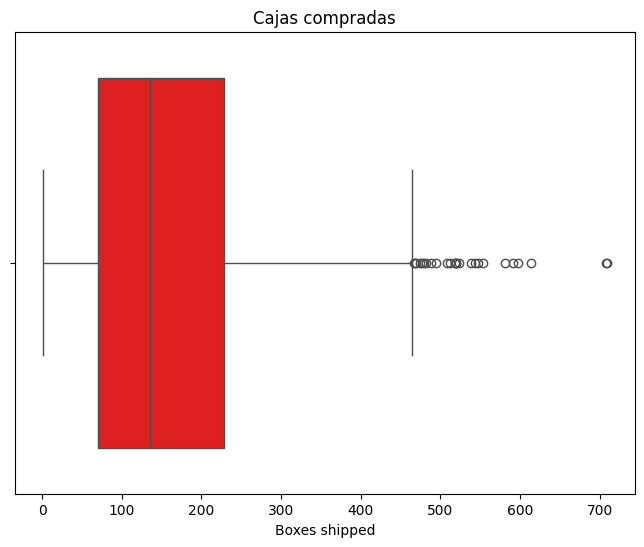

In [106]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Boxes Shipped'], color='red')
plt.title('Cajas compradas')
plt.xlabel('Boxes shipped')
plt.show()

In [ ]:
df_clean2= df_clean[(df_clean['Boxes Shipped']>boxes_min)&(df_clean['Boxes Shipped']<boxes_max)]
df_clean2


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410.0,323
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559.0,119
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574.0,217
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086.0,384


In [73]:
df_clean['Date'].min()

'2022-01-03'

In [74]:
df_clean['Date'].max()


'2022-08-31'

In [109]:
df_clean.groupby(by='Sales Person').count().sort_values(by='Amount',ascending=False)

,Country,Product,Date,Amount,Boxes Shipped
Sales Person,,,,,
Kelci Walkden,54,54,54,54,54
Brien Boise,53,53,53,53,53
Van Tuxwell,51,51,51,51,51
Beverie Moffet,50,50,50,50,50
Dennison Crosswaite,49,49,49,49,49
Oby Sorrel,49,49,49,49,49
Ches Bonnell,48,48,48,48,48
Gigi Bohling,47,47,47,47,47
Karlen McCaffrey,47,47,47,47,47


to_replace = "H"
value = "Masculino"
df_clean_2['Género'].replace(to_replace, value, inplace=True)

C:\Users\crisj\AppData\Local\Temp\ipykernel_15556\3268664696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Country', data=df, palette='Set2')


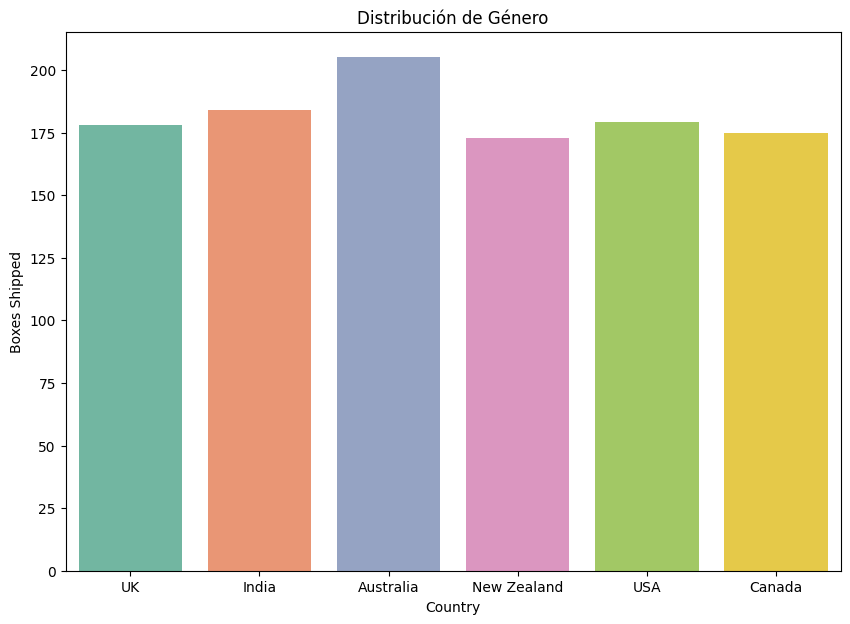

In [60]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Country', data=df, palette='Set2')
plt.title('Distribución de Género')
plt.xlabel('Country')
plt.ylabel('Boxes Shipped')
plt.show()

In [110]:
df_clean.groupby(by='Country').count()


,Sales Person,Product,Date,Amount,Boxes Shipped
Country,,,,,
Australia,205,205,205,205,205
Canada,175,175,175,175,175
India,184,184,184,184,184
New Zealand,173,173,173,173,173
UK,178,178,178,178,178
USA,179,179,179,179,179


In [160]:
df_clean.groupby(by='Product')['Boxes Shipped'].sum().sort_values(ascending=False)

Product
50% Dark Bites          9792
Smooth Sliky Salty      8810
Eclairs                 8757
Caramel Stuffed Bars    8717
Spicy Special Slims     8685
Drinking Coco           8660
Milk Bars               8330
Peanut Butter Cubes     8304
After Nines             8257
White Choc              8240
Mint Chip Choco         8207
99% Dark & Pure         8127
70% Dark Bites          8015
85% Dark Bars           7793
Manuka Honey Choco      7781
Organic Choco Syrup     7749
Fruit & Nut Bars        7738
Orange Choco            7732
Raspberry Choco         7115
Baker's Choco Chips     6998
Almond Choco            6736
Choco Coated Almonds    6464
Name: Boxes Shipped, dtype: int64

In [174]:

df_boxes= df_clean.groupby(['Product'])['Boxes Shipped'].sum().reset_index()
df_boxes= df_boxes.sort_values(by=['Boxes Shipped'],ascending=False)
df_boxes


,Product,Boxes Shipped
0,50% Dark Bites,9792
19,Smooth Sliky Salty,8810
10,Eclairs,8757
7,Caramel Stuffed Bars,8717
20,Spicy Special Slims,8685
9,Drinking Coco,8660
13,Milk Bars,8330
17,Peanut Butter Cubes,8304
4,After Nines,8257
21,White Choc,8240


C:\Users\crisj\AppData\Local\Temp\ipykernel_15556\142660875.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pais, x='Boxes Shipped', y='Product', ax=ax, palette='viridis')
C:\Users\crisj\AppData\Local\Temp\ipykernel_15556\142660875.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pais, x='Boxes Shipped', y='Product', ax=ax, palette='viridis')
C:\Users\crisj\AppData\Local\Temp\ipykernel_15556\142660875.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pais, x='Boxes Shipped', y='Product', ax=ax, palette='vi

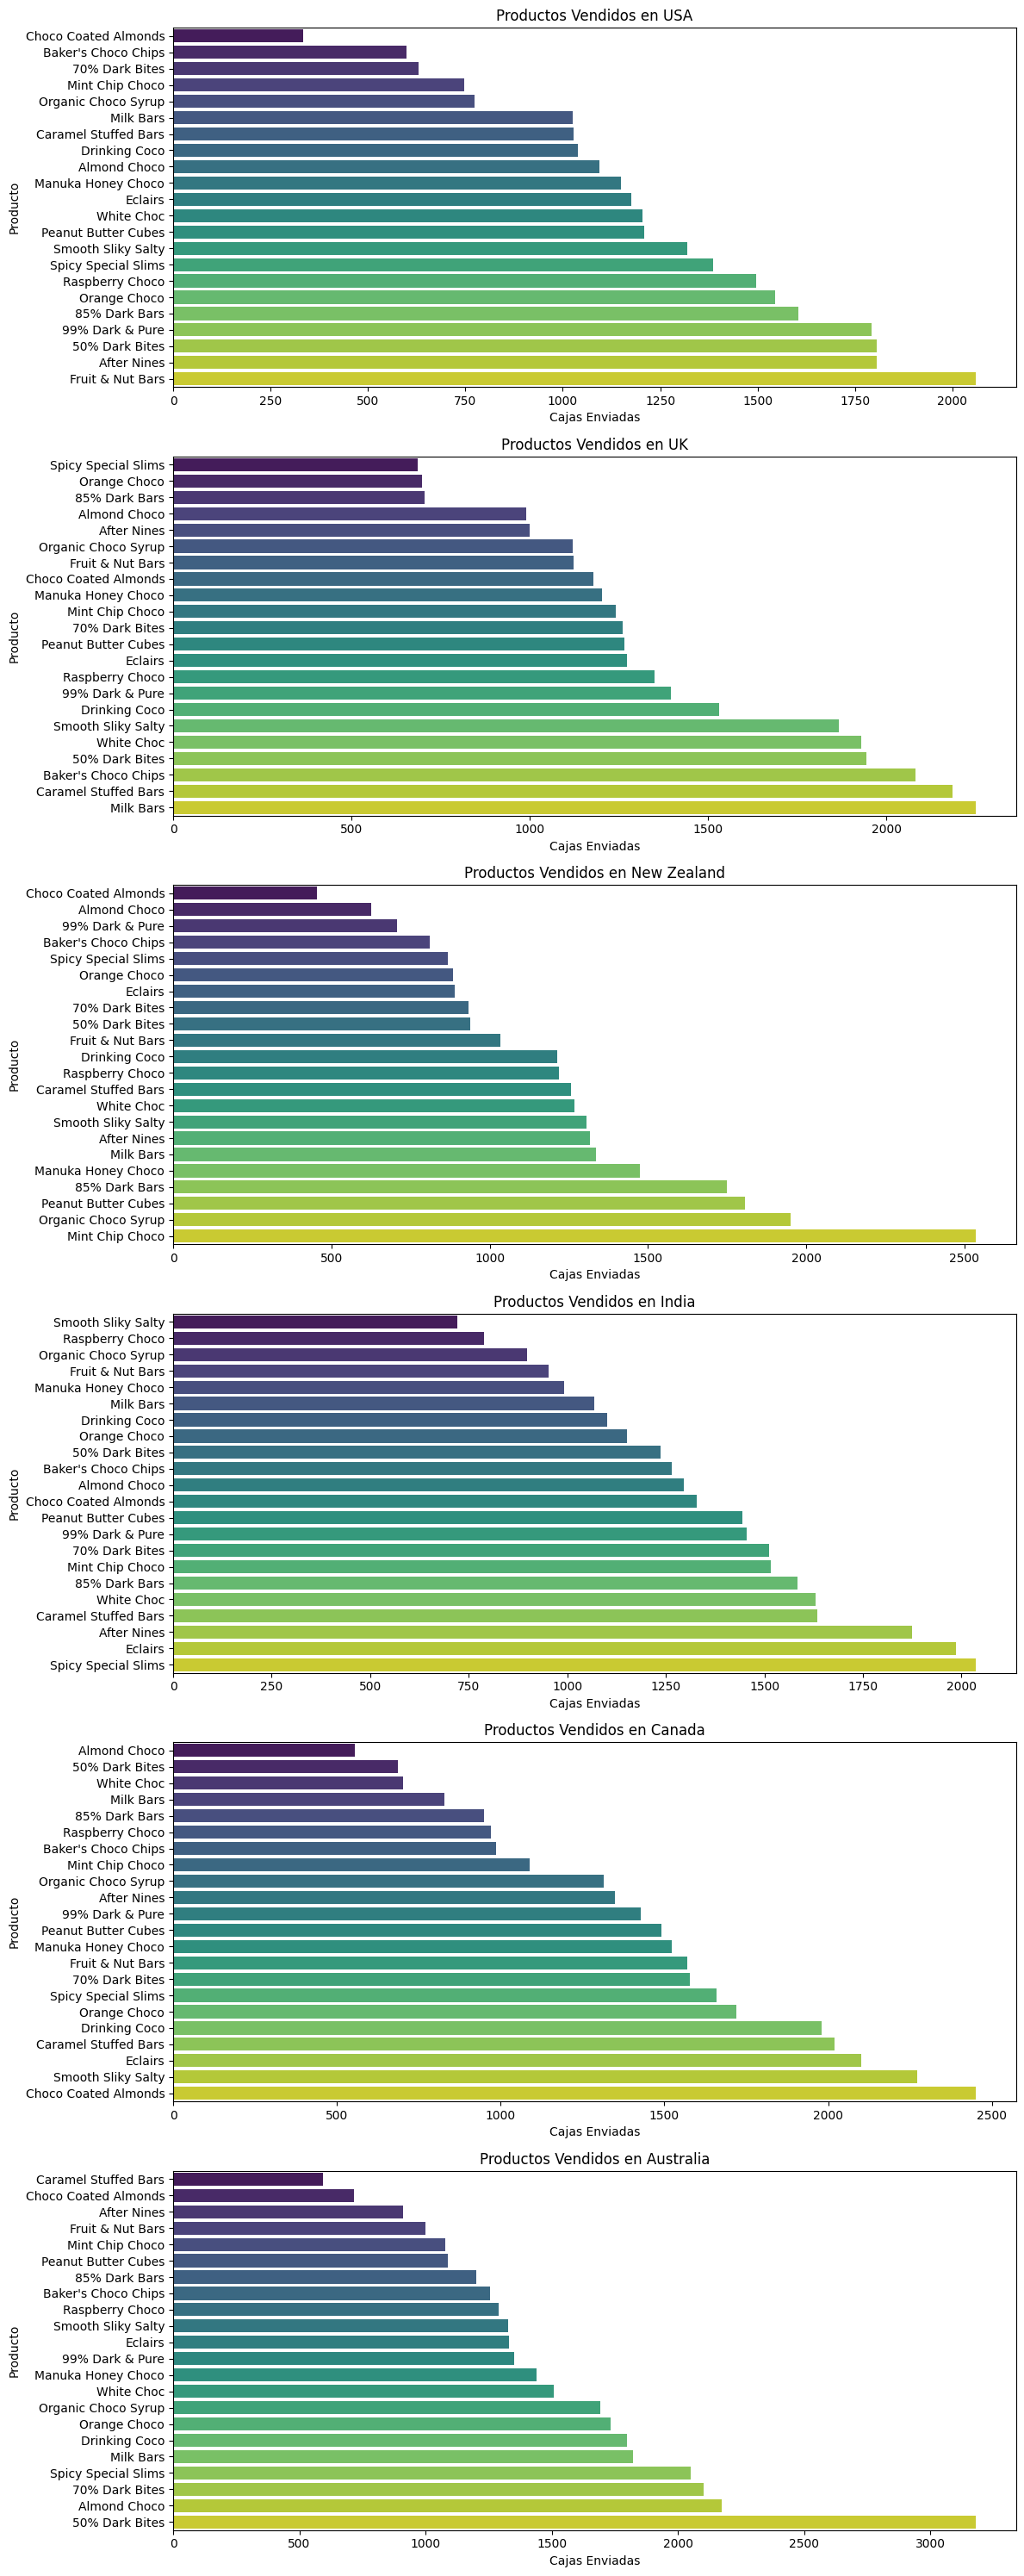

In [158]:
# Crear una lista de países únicos
paises = df_boxes['Country'].unique()

# Crear subgráficos para cada país
fig, axes = plt.subplots(nrows=len(paises), ncols=1, figsize=(12, 5 * len(paises)))

# Si solo hay un país, hacer que `axes` sea una lista para evitar errores
if len(paises) == 1:
    axes = [axes]

# Iterar sobre cada país y crear su gráfico
for ax, pais in zip(axes, paises):
    df_pais = df_boxes[df_boxes['Country'] == pais]
    
    # Ordenar productos de menor a mayor cantidad de cajas enviadas dentro del país
    df_pais = df_pais.sort_values(by='Boxes Shipped', ascending=True)

    # Crear gráfico de barras
    sns.barplot(data=df_pais, x='Boxes Shipped', y='Product', ax=ax, palette='viridis')

    # Personalización del gráfico
    ax.set_title(f'Productos Vendidos en {pais}')
    ax.set_xlabel('Cajas Enviadas')
    ax.set_ylabel('Producto')

plt.tight_layout()
plt.show()


In [143]:
# Crear una tabla de frecuencia con los productos vendidos por cada país
tabla_frecuencia = df.pivot_table(index='Product', columns='Country', values='Amount', aggfunc='count', fill_value=0)

# Encontrar productos que tienen un conteo de 0 en algún país
productos_faltantes = (tabla_frecuencia == 0).any(axis=1)

# Mostrar los productos que faltan en algún país
productos_sin_ventas = tabla_frecuencia[productos_faltantes]

print("Productos que NO se venden en al menos un país:")
print(productos_sin_ventas)


Productos que NO se venden en al menos un país:
Empty DataFrame
Columns: [Australia, Canada, India, New Zealand, UK, USA]
Index: []


In [ ]:
#Boxes totales por country
boxes_por_pais = df.groupby('Country')['Boxes Shipped'].sum().reset_index()
boxes_por_pais = boxes_por_pais.sort_values(by='Boxes Shipped', ascending=False)
print(boxes_por_pais)

       Country  Boxes Shipped
0    Australia          32647
1       Canada          31221
4           UK          30265
2        India          29470
5          USA          26824
3  New Zealand          26580


C:\Users\crisj\AppData\Local\Temp\ipykernel_15556\1545281893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=boxes_por_pais, x='Boxes Shipped', y='Country', palette='magma')


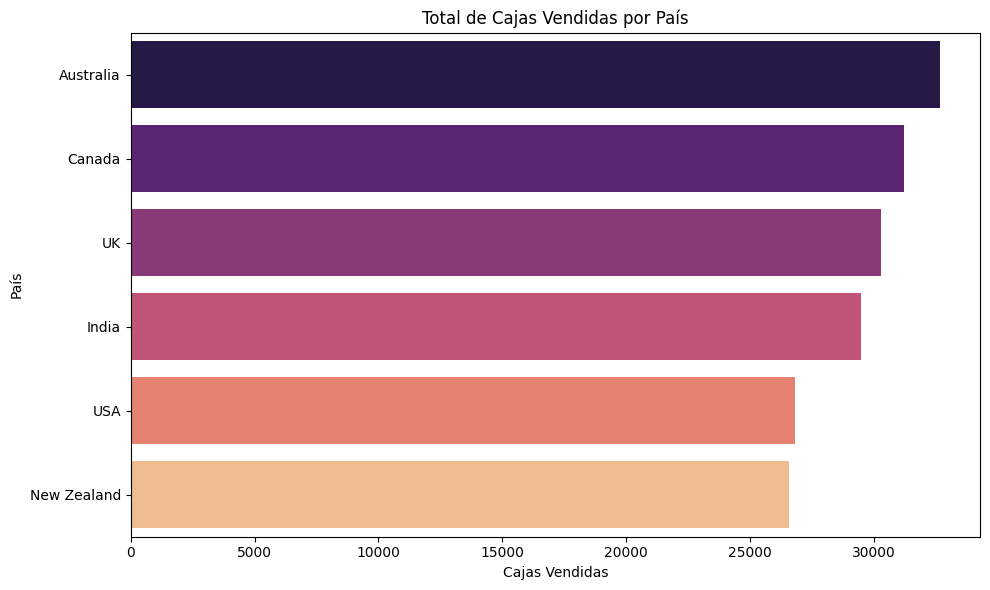

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=boxes_por_pais, x='Boxes Shipped', y='Country', palette='magma')

# Personalizar
plt.title('Total de Cajas Vendidas por País')
plt.xlabel('Cajas Vendidas')
plt.ylabel('País')
plt.tight_layout() #Evita que las etiquetas se corten
plt.show()

In [166]:
monto_por_pais= df_clean.groupby('Country')['Amount'].sum().reset_index()
monto_por_pais = monto_por_pais.sort_values(by='Amount', ascending=False)
print(monto_por_pais)

       Country     Amount
0    Australia  1137367.0
4           UK  1051792.0
2        India  1045800.0
5          USA  1035349.0
1       Canada   962899.0
3  New Zealand   950418.0


In [171]:
#Clientes po pais
clientes_pais = df_clean[['Sales Person', 'Country']].drop_duplicates().reset_index(drop=True)

cliente_por_pais= clientes_pais.groupby('Country')['Sales Person'].count().reset_index()
cliente_por_pais= cliente_por_pais.sort_values(by='Sales Person', ascending=False)
print(cliente_por_pais)

       Country  Sales Person
0    Australia            25
1       Canada            25
2        India            25
3  New Zealand            25
4           UK            25
5          USA            25


In [172]:
df[['Amount', 'Boxes Shipped']].corr()


,Amount,Boxes Shipped
Amount,1.000000,-0.018827
Boxes Shipped,-0.018827,1.000000
